In [1]:
import pandas as pd
import numpy as np
import datetime

from datetime import datetime
from numpy import datetime64 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [2]:
from vega_datasets import data
df_resample = data.sf_temps()
df_resample.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


#### Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
pd.to_datetime('2010-01-01 00:00:00')

Timestamp('2010-01-01 00:00:00')

In [4]:
df = data.sf_temps()
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [5]:
df_day = df
df_day = df_day.resample('D').mean().head()

<AxesSubplot:xlabel='date'>

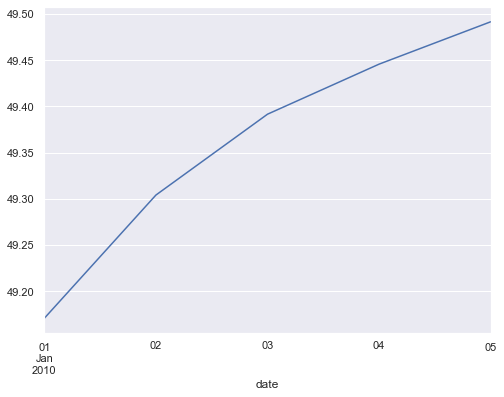

In [6]:
df_day.temp.plot()

2. Write the code necessary to visualize the minimum temperature over time.


In [7]:
df_min = df
df_min = data.sf_temps()
df_min.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [8]:
df_min = df_min.set_index('date').sort_index()
df_min.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [9]:
df_min = df_min.resample('D').min().head()
df_min.head()

,temp
date,
2010-01-01,45.80
2010-01-02,46.00
2010-01-03,46.10
2010-01-04,46.10
2010-01-05,46.10


<AxesSubplot:xlabel='date'>

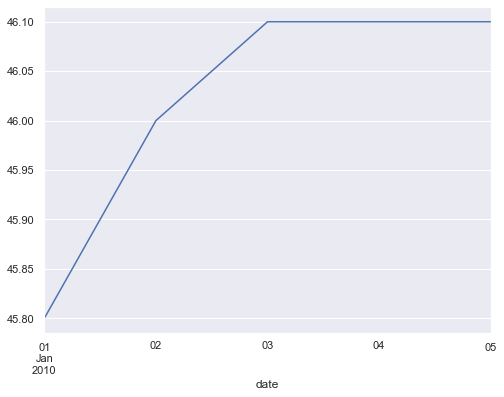

In [10]:
df_min.temp.plot()

3. Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

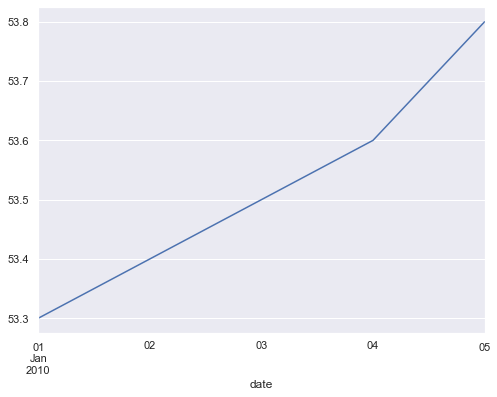

In [11]:
df_max = df
df_max = data.sf_temps()
df_max = df_max.set_index('date').sort_index()
df_max = df_max.resample('D').max().head()
df_max.temp.plot()

4. Which month is the coldest, on average?


In [12]:
df_coldest = df
df_coldest = data.sf_temps()
df_coldest = df_coldest.set_index('date').sort_index()
df_coldest['month'] = df_coldest.index.month_name()
df_coldest.groupby('month').temp.mean()
# January

month
April       55.63
August      62.41
December    50.50
February    52.24
January     49.98
July        61.77
June        60.44
March       53.96
May         57.97
November    55.19
October     60.25
September   62.49
Name: temp, dtype: float64

5. Which month has the highest average temperature?


In [13]:
df_hottest = df
df_hottest = data.sf_temps()
df_hottest = df_hottest.set_index('date').sort_index()
df_hottest['month'] = df_hottest.index.month_name()
df_hottest.groupby('month').temp.mean()
# September

month
April       55.63
August      62.41
December    50.50
February    52.24
January     49.98
July        61.77
June        60.44
March       53.96
May         57.97
November    55.19
October     60.25
September   62.49
Name: temp, dtype: float64

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [14]:
df_agg = df
df_agg.resample('D').agg(['min', 'max']).head()


temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80

min_temp = df_agg.min
max_temp = df_agg.max
df_agg['temp_variance'] = (max_temp - min_temp)

7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

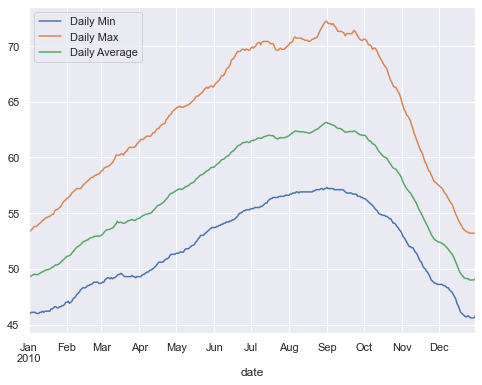

In [15]:
# Plot raw data with monthly resampled data
df_agg.resample('D').min().temp.plot(label = 'Daily Min')
df_agg.resample('D').max().temp.plot(label = 'Daily Max')
df_agg.resample('D').mean().temp.plot(label = 'Daily Average')
plt.legend();

___

In [16]:
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


#### Use the dataset to answer the following questions:

8.  Which year and month combination has the highest amount of precipitation?

In [17]:
df = data.seattle_weather()
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [18]:
df = df.resample('M').max().head()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,27.70,12.80,7.20,8.20,sun
2012-02-29,17.30,16.10,7.80,8.10,sun
2012-03-31,27.40,15.60,7.20,7.00,sun
2012-04-30,10.90,23.30,10.00,8.00,sun
2012-05-31,18.50,26.70,12.80,6.40,sun


In [19]:
df.nlargest(1, 'precipitation')

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,27.70,12.80,7.20,8.20,sun


9.  Visualize the amount of monthly precipitation over time.


In [20]:
df = data.seattle_weather()
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


<AxesSubplot:xlabel='date'>

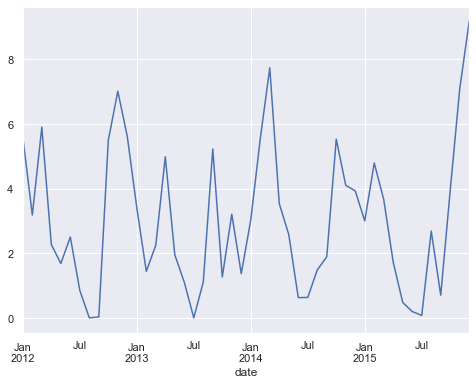

In [21]:
df.resample('M').mean().precipitation.plot(label = 'Monthly Precipitation')

10.  Visualize the amount of wind over time. Choose a time interval you think is appropriate.


In [22]:
df = data.seattle_weather()
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


<AxesSubplot:xlabel='date'>

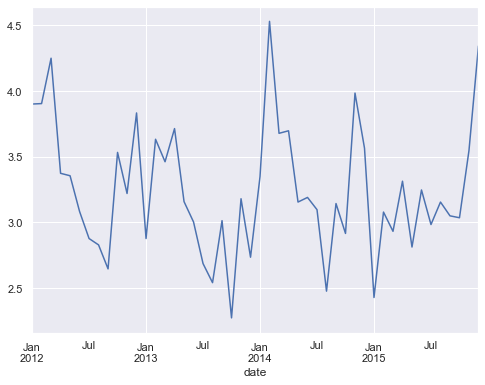

In [23]:
df.resample('M').mean().wind.plot(label = 'Monthly Precipitation')

11. Which year-month combination is the windiest?


In [24]:
df.nlargest(1, 'wind')

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-17,2.00,8.30,1.70,9.50,rain


12. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [25]:
df = data.seattle_weather()
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [26]:
dummy = pd.get_dummies(df.weather)
df = pd.concat([df, dummy], axis=1)
df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun
date,,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,1,0,0,0,0
2012-01-02,10.90,10.60,2.80,4.50,rain,0,0,1,0,0
2012-01-03,0.80,11.70,7.20,2.30,rain,0,0,1,0,0
2012-01-04,20.30,12.20,5.60,4.70,rain,0,0,1,0,0
2012-01-05,1.30,8.90,2.80,6.10,rain,0,0,1,0,0


In [27]:
df['year'] = df.index.year

In [28]:
df.groupby('year').sun.sum().nlargest(1)
#2014

year
2014    211
Name: sun, dtype: uint8

13. In which month does it rain the most?


In [29]:
df['month'] = df.index.month_name()
df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun,year,month
date,,,,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,1,0,0,0,0,2012,January
2012-01-02,10.90,10.60,2.80,4.50,rain,0,0,1,0,0,2012,January
2012-01-03,0.80,11.70,7.20,2.30,rain,0,0,1,0,0,2012,January
2012-01-04,20.30,12.20,5.60,4.70,rain,0,0,1,0,0,2012,January
2012-01-05,1.30,8.90,2.80,6.10,rain,0,0,1,0,0,2012,January


In [30]:
df.groupby('month').rain.sum().nlargest()
#February

month
February    40
March       37
January     35
November    25
December    23
Name: rain, dtype: uint8

14. Which month has the most number of days with a non-zero amount of precipitation?

In [31]:
df['no_precip'] = df.precipitation == 0
df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun,year,month,no_precip
date,,,,,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,1,0,0,0,0,2012,January,True
2012-01-02,10.90,10.60,2.80,4.50,rain,0,0,1,0,0,2012,January,False
2012-01-03,0.80,11.70,7.20,2.30,rain,0,0,1,0,0,2012,January,False
2012-01-04,20.30,12.20,5.60,4.70,rain,0,0,1,0,0,2012,January,False
2012-01-05,1.30,8.90,2.80,6.10,rain,0,0,1,0,0,2012,January,False


In [32]:
df.groupby('month').no_precip.sum().nlargest()
#July

month
July         113
August       102
May           90
September     85
June          83
Name: no_precip, dtype: int64

___

In [33]:
df = data.flights_20k()
df = df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


15. Convert any negative delays to 0.


In [34]:
df[df.delay < 0] = 0
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,0,0,0
2001-01-01 07:00:00,0,0,0,0
2001-01-01 07:00:00,0,303,MSY,HOU


16. Which hour of the day has the highest average delay?


In [35]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,0,0,0,6
2001-01-01 07:00:00,0,0,0,0,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [36]:
df.groupby('hour').delay.mean().nlargest()
# hour 3

hour
3    302.50
1    170.00
0    127.92
23    65.35
22    32.70
Name: delay, dtype: float64

17. Does the day of the week make a difference in the delay amount?


In [37]:
df['day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,0,0,0,6,Monday
2001-01-01 07:00:00,0,0,0,0,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [38]:
df.groupby('day').delay.mean().nlargest()

day
Friday      17.76
Thursday    12.82
Wednesday   11.03
Sunday      10.41
Tuesday      9.41
Name: delay, dtype: float64

18. Does the month make a difference in the delay amount?

In [39]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,0,0,0,6,Monday,January
2001-01-01 07:00:00,0,0,0,0,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


In [40]:
df.groupby('month').delay.mean().nlargest()

month
February   12.31
January    11.30
March       9.88
Name: delay, dtype: float64

___

#### Bonus

In [41]:
from vega_datasets import data
df = data.iowa_electricity()
df = df.set_index('year').sort_index()
df.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


19. For each row, calculate the percentage of the year's total that energy source provided.


In [42]:
df = df.resample('M').max().head()

20. Lineplot of generation over time, color by source


21. Display the data as table where years are columns, and energy source is rows (Hint: df_resample.pivot_table)


22. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?


23. Is the total generation increasing over time?


- How would you control for increasing consumption over time when considering how much energy is coming from each source?


- express each number as a % of the year's total

___

24. Use the sf_temps dataset


25. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)


26. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.


27. Create pretty labels for time plots


28. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar


___

Explore the birdstrikes dataset.

In [43]:
df_resample = data.birdstrikes()

HTTPError: HTTP Error 404: Not Found